# **Documentation**

##**Answer the questions**



**1-Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?**

`-No :  `
`because RNNs are better suited to analyzing temporal, sequential data, such as text or videos. A CNN has a different architecture from an RNN. CNNs are "feed-forward neural networks" that use filters and pooling layers, whereas RNNs feed results back into the network
When the input image is of size (28x28x3) pixels, a fully connected neural network will have 2352 weights in the first hidden layer. In real life, the images have at least 200x200x3 pixels which results in 120,000 weights in the first hidden layer itself. Having so many parameters will result in overfitting. In such a scenario`

`-No :Fully connected neural networks aren't good for feature extraction.so its not good for image 
and fully-connected model is not appropriate when our model or one of our layers has more than one input or output, we need to do layer sharing or we want to use a non-linear topology e.g. residual or skip-connection
`

`so CNNs are trained to identify and extract the best features from the images for the problem at hand. That is their main strength. The latter layers of a CNN are fully connected because of their strength as a classifier`


---


**2-What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?**

`-In a network of n hidden layers, n derivatives will be multiplied together. If the derivatives are large then the gradient will increase exponentially as we propagate down the model until they eventually explode, and this is what we call the problem of exploding gradient. Alternatively, if the derivatives are small then the gradient will decrease exponentially as we propagate through the model until it eventually vanishes, and this is the vanishing gradient problem.`

`-Vanishing Gradient occurs when the derivative or slope will get smaller and smaller as we go backward with every layer during backpropagation.`

`-Exploding gradient occurs when the derivatives or slope will get larger and larger as we go backward with every layer during backpropagation. This situation is the exact opposite of the vanishing gradients.`


`-LSTMs solve the problem using a unique additive gradient structure that includes direct access to the forget gate's activations, enabling the network to encourage desired behaviour from the error gradient using frequent gates update on every time step of the learning process`



```
LSTM (short for long short-term memory) primarily solves 
the vanishing gradient problem in backpropagation. 
LSTMs use a gating mechanism that controls the memoizing process. 
LSTM ’s and GRU’s were created as the solution to short-term memory. 
They have internal mechanisms called gates that can regulate the flow of information.
```

---

**3-What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?**


`-Multi-task Learning (MTL) is a collection of techniques intended to learn multiple tasks simultaneously instead of learning them separately.`

`-Multitasking refers to either the ability to pay attention to several pieces of information at the same time or the process of performing more than one task at the same time`

```
Multi-task learning (MTL) is a subfield of machine learning 
in which multiple learning tasks are solved at the same time, 
while exploiting commonalities and differences across tasks

```

`-multi-objective to achieve multiple targets in this assignment like predict price and type`

`-Multimodal machine learning aims to build models that can process and relate information from multiple modalities.`

`- in this assignment we use one model to work on text and image at the same time Inputs (two modalities): (text data) (image data)`

---


**4-What is the difference among xgboost, lightgbm and catboost**

`-XGBoost, CatBoost, and LightGBM have emerged as the most optimized boosting techniques for gradient-boosted tree algorithms`

```
-XGBoost:
XGBoost cannot handle categorical
features by itself, it only accepts numerical values similar
to Random Forest. Therefore one has to perform various encodings
like label encoding, mean encoding or one-hot encoding before
supplying categorical data to XGBoost
```

```
CatBoost:
CatBoost has the flexibility of giving indices of categorical 
columns so that it can be encoded as one-hot encoding 
using one_hot_max_size (Use one-hot encoding for all 
features with number of different values less than or equal 
to the given parameter value)
```


```
LightGBM:
Similar to CatBoost, LightGBM can also handle categorical 
features by taking the input of feature names. 
It does not convert to one-hot coding, and is much faster than 
one-hot coding. LGBM uses a special algorithm to find the split value of categorical features
```


---


## **Problem Formulation:**

* **Define the problem?**

```
the problem is when people prepare to post 
a new listing on airbnb is, how much should one ask for? 
so we are going to predict the listing price based on the 
listing characteristics and some images (In this problem, 
the task is to determine an appropriate listing price for 
a new listing on Airbnb. Instead of predicting the actual 
listing price using regression, the objective is to predict 
which pricing bin or range is appropriate for a new listing. 
A multi-objective approach is used to predict the price range 
of a new listing, along with the type of rental being advertised. 
To do so, a multi-modality approach is also applied, whereby 
images of a listing along with an accompanying text 
summary are used for training.)
```
* **What is the input?**

```
the input is images for different type of buildings (house,apartment and so on )
with its description 
```
* **What is the output?**

```
the output is predict type and price based on the input image and sammry 
```
* **What data mining function is required?**

```
In this problem we use to make classification so i used softmax 
as activation function to make classification
```
* **What could be the challenges?**

```
the challenges is data has alot of noise and the images not same size 
so we should do some preprocessing before using this data 
text data has mulible languages so it need to be translated 
```
* **What is the impact?**

```
the impact is optimize user experience and lower the bar to be a new host

```
* **What is an ideal solution?**

```
the ideal solution for this problem that model predict price and type 
for any new post perfectly and gets optimal accuracy
```
* **What is the experimental protocol used and how was it carried out?**

```
the training and test datasets for a set of rental 
properties are loaded into pandas dataframes. Images are 
loaded as greyscale (2 channels), and re-sized into size 64x64x2. 
Text summaries are also loaded as strings.
```

```
Then, the text data is preprocessed by first fitting a 
tokenizer on all of the text summaries. This creates a 
vocabulary of 40000 unique words. This tokenizer is used 
to generate a sequence of integers for each summary using 
this vocabulary. A max sequence length of 100 words is enforced 
to truncate long sequences, and to pad shorter sequences with zeros 
to maintain consistent input dimensions.
```
 `Embeddings are generated for the input text, and the average of the embeddings is computed for each sequence. A feature vector is created for the input images by passing their values through a 2D convolutional layer, using 2D max-pooling to reduce the size, and then flattening that output. These output vectors are concatenated and passed to a dense layer using softmax activation to perform separate multi-class classification tasks on price and type labels`

 --------

### **Install some libraries**

Install translate library becouse the data has multi language ,so I will translate all to english 

In [ ]:
# !pip install googletrans==3.1.0a0

In [ ]:
# !pip install deep-translator

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### **Import libraries**

In [ ]:
import re # regax library
from googletrans import Translator #google translate library
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
# style.use('fivethirtyeight')
# sns.set(color_codes=True)
#nltk
import nltk

#stop-words
from nltk.corpus import stopwords
stop_words=set(nltk.corpus.stopwords.words('english'))

# tokenizing
from nltk import word_tokenize,sent_tokenize

#import the os module to interact with the underlying operating system
import os 
#for creating Progress Meters or Progress Bars
from tqdm.notebook import tqdm
# including functions to load images from files
from PIL import Image
#The ast. literal_eval method is one of the helper functions that helps traverse an abstract syntax tree
from ast import literal_eval
#split data to train and test 
from sklearn.model_selection import train_test_split
#native Python library that allows you to customize the formatting of your output
from pprint import pprint
#stop words are used to eliminate unimportant words
from nltk.corpus import stopwords
#splits a given sentence into words using the NLTK library
from nltk.tokenize import word_tokenize

#tensorflow and keras
import tensorflow as tf
from tensorflow import keras
#Optimizers are used to solve optimization problems by minimizing loss
from keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
#Tokenization breaks the raw text into words
from keras.preprocessing.text import one_hot,Tokenizer
#pad_sequences is used to ensure that all sequences in a list have the same length
from keras.preprocessing.sequence import pad_sequences
#layers for neural neywork
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D , Dropout , LSTM,Embedding


from __future__ import absolute_import, division, print_function, unicode_literals
#__future__ module is a built-in module in Python that is used to inherit new features that will be available in the new Python versions.
import collections#a container that is used to store collections of data

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer() 
stemmer = SnowballStemmer(language='english')
stop_words = set(stopwords.words("english"))

In [ ]:
#Get file of data and download it 
# ! wget https://github.com/CISC-873/Information-2021/releases/download/data/a4.zip
# ! unzip -q a4.zip

In [ ]:
df_train= pd.read_csv('/content/train_xy.csv')#read train data 
df_test =pd.read_csv('/content/test_x.csv' , index_col='id')#read test data

In [ ]:
df_train.head(8)#show some row of data 

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
5,"Small and cozy studio, all equipped, ideally s...",img_train/5.jpg,Apartment,0
6,Charming apartment! A place where you will fee...,img_train/6.jpg,Apartment,0
7,Grande chambre dans une maison pour étudiants....,img_train/7.jpg,House,0


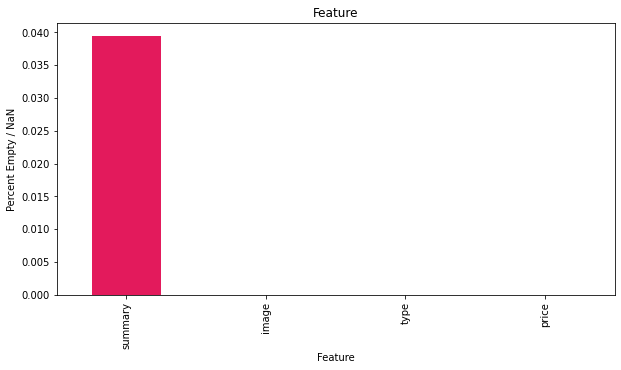

In [ ]:
#show percent of nan values 
percentage_missing_data = df_train.isnull().sum() / df_train.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='#E31A5C', figsize = (10, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature')
plt.show()

In [ ]:
# information about data 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7326 non-null   object
 1   image    7627 non-null   object
 2   type     7627 non-null   object
 3   price    7627 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.5+ KB


In [ ]:
#count values of our label (type)
df_train['type'].value_counts()

Apartment                 5765
Condominium                691
House                      406
Loft                       324
Townhouse                  167
Serviced apartment          77
Bed and breakfast           38
Guest suite                 32
Hostel                      26
Bungalow                    25
Guesthouse                  14
Cottage                     12
Aparthotel                  12
Boutique hotel              10
Other                        8
Villa                        7
Tiny house                   3
Boat                         2
Cabin                        2
Camper/RV                    2
Casa particular (Cuba)       1
Hotel                        1
Earth house                  1
Castle                       1
Name: type, dtype: int64

# **Data Preprocessing**



```
We have image and text data.
Image data: resize
Text data: tokenization and converting to integer IDs
```



In [ ]:
#create function to load image from source ,resize and convert it to same size and color 
def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64))#Represents L with Alpha transparency channel#resize((64, 64))
        arr = np.array(image)
    except:
        arr = np.zeros((64, 64,2))
    return arr


In [ ]:
# loading images:
df_train_image = np.array([load_image(i) for i in tqdm(df_train.image)])

# loading overview: (force convert some of the non-string cell to string)
df_train_text = df_train.summary.astype('str')

  0%|          | 0/7627 [00:00<?, ?it/s]

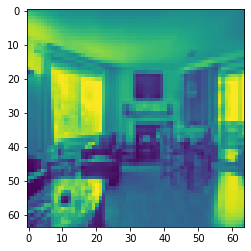

In [ ]:
# check image loading
import matplotlib.pyplot as plt
plt.imshow(df_train_image[3,:,:,0])
plt.show()



---


## **Label**

In [ ]:
#encode the prediction labels
df_train['type'] = df_train['type'].astype('category').cat.codes
df_train['price'] = df_train['price'].astype('category').cat.codes
len_type = len(df_train['type'].unique())
len_price = len(df_train.price.unique())

# get price 
y_train_price = df_train.price

# get type
y_train_type = df_train['type']


In [ ]:
df_train = df_train.dropna()#drop nan value
df_train= df_train.reset_index(drop=True)

In [ ]:
df_train.isnull().sum() #check null value for all columns

summary    0
image      0
type       0
price      0
dtype: int64

### **Text Preprocessing**

In [ ]:
df_train_text#show data before translate 

0       Spacious, sunny and cozy modern apartment in t...
1       Located in one of the most vibrant and accessi...
2       Logement coquet et douillet à 10 minutes du ce...
3       Beautiful and spacious (1076 sc ft, / 100 mc) ...
4       Très grand appartement ''rustique'' et très ag...
                              ...                        
7622    Un grand logement 4 et 1/2, tout inclut, bien ...
7623    Magnificent condo directly on the river. You w...
7624    This apartment is perfect for anyone visiting ...
7625    It is a cozy ,clean ,and comfortable apartment...
7626    Modern country style (newly-renovated); open c...
Name: summary, Length: 7627, dtype: object

In [ ]:
translator = Translator()#show data before translate 

In [ ]:
df_train_text= df_train_text.apply(lambda x: translator.translate(x, dest='en').text)#the data has multi language so i will translate it to english

In [ ]:
df_train_text#show data after translate

0       Spacious, sunny and cozy modern apartment in t...
1       Located in one of the most vibrant and accessi...
2       Pretty and cozy accommodation 10 minutes from ...
3       Beautiful and spacious (1076 sc ft, / 100 mc) ...
4       Very large ''rustic'' and very pleasant apartm...
                              ...                        
7622    A large 4 and 1/2 apartment, all inclusive, we...
7623    Magnificent condo directly on the river. You w...
7624    This apartment is perfect for anyone visiting ...
7625    It is a cozy ,clean ,and comfortable apartment...
7626    Modern country style (newly-renovated); open c...
Name: summary, Length: 7627, dtype: object

In [ ]:
#create function to clean data and remove stop words
def clean_text(text, for_embedding=False):

    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE) #ignore white space 
    RE_TAGS = re.compile(r"<[^>]+>")#remove tags
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)#remove ascii code
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)#remove singe char
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

In [ ]:
df_train_text= df_train_text.apply(clean_text)#apply function on text

In [ ]:
df_train_text#show data after cleaning

0       spacious sunni cozi modern apart heart montrea...
1       locat one vibrant access locat downtown montre...
2       pretti cozi accommod minut downtown montreal g...
3       beauti spacious sc ft mc condo th floor west i...
4       larg rustic pleasant apart rent nice neighborh...
                              ...                        
7622    larg apart inclus well lit locat quiet build r...
7623    magnific condo direct river sleep song wild bi...
7624    apart perfect anyon visit citi locat eclect ne...
7625    cozi clean comfort apart heart downtown websit...
7626    modern countri style newli renov open concept ...
Name: summary, Length: 7627, dtype: object

In [ ]:
from pandas.core.frame import DataFrame
DataFrame(df_train_text).to_csv("edited.csv")#save the editing into csv file

In [ ]:
# preprocess text data
#Updates internal vocabulary based on a list of texts.
# In the case where texts contains lists, we assume each entry of the lists to be a token.
# Required before using texts_to_sequences or texts_to_matrix
vocab_size = 600000#40000
max_len = 100

# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
print(tokenizer )
tokenizer.fit_on_texts(df_train_text)

#The Keras Embedding layer requires all individual documents to be of same length
#To pad the shorter documents I am using pad_sequences functon from the Keras library.
def _preprocess(list_of_text):
    return pad_sequences(
        #Transforms each text in texts to a sequence of integers.
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        #Optional Int, maximum length of all sequences. If not provided, sequences
        # will be padded to the length of the longest individual sequence.
        # pad variable length sequences with dummy values
        #String, 'pre' or 'post' (optional, defaults to 'pre'): pad either before or after each sequence.
        padding='post',
    )

# padding is done inside: 
df_train_text_id = _preprocess(df_train_text)

print(df_train_text_id.shape)

(7627, 100)


In [ ]:
# we can use the tokenizer to convert IDs to words.by using "sequences_to_texts" 
pprint(tokenizer.sequences_to_texts(df_train_text_id[:3]))

['spacious sunni cozi modern apart heart montreal bedroom central locat '
 'popular plateau mont royal neighborhood middl princ arthur pedestrian street '
 'close amen restaur coffe hous bar club shop univers subway station experi '
 'montreal like real local resid heart action grand prix week grill saint '
 'laurent festiv mural much',
 'locat one vibrant access locat downtown montreal one bedroom condo impress '
 'leav one memor experi walk distanc popular saint catherin street bell center '
 'old port lachin canal bonaventur metro much much',
 'pretti cozi accommod minut downtown montreal groceri store pharmaci saq '
 'restaur public transport nearbi two close bedroom accommod adult']


In [ ]:
#print the number of words in the dictionary 
print('total words in the dictionary:', tokenizer.num_words)

total words in the dictionary: 600000




`
Thus the embedding layer in Keras can be used when we want to create the embeddings to embed higher dimensional data into lower dimensional vector space.
`





```
PARAMETERS OF THE EMBEDDING LAYER 
'input_dim' = the vocab size that we will choose.
In other words it is the number of unique words in the vocab.
'output_dim' = the number of dimensions we wish to embed into.
Each word will be represented by a vector of this much dimensions.
'input_length' = lenght of the maximum document. which is stored in maxlen variable in our case
```







# **Trail_1**




Cover dropout layer

```
Plan_1:
in this trail I will use multi model multi objective to predict price and type 
but i will focus on price 
we have two input one is text and another is image 
in text part i will use empedding layer to train text input by max_len =150
and i will take average for this layer then 
we have input image,i will use conv2d as first layer then i will use dropout 
and maxpolling is second and third layer then make flatten 
the output predict multilabel so i will use two dense layer with 
activation function softmax 

```

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 

# simple conv2d with dropout
cov1 = Conv2D(10, (15,15) , activation='relu')(in_image) # 10 number of filters  and  (15, 15) size of filter
con_drop = Dropout(0.2)(cov1) #add drop out layer 
pl = MaxPool2D((10, 10))(con_drop)#add maxpooling layer 
flattened = Flatten()(pl)#add flatten layer 

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)#merge between two input 

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)#layer for predict type 
p_price = Dense(len_price, activation='softmax', name='price')(fused)#layer for predict price 


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),#using adam optimizer with learning rate 1e-3
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.2,#becouse i need to focus on price i put type to 0.2to make model concentrate on one label 
        'price': 0.7,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 50, 50, 10)   4510        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 dropout (Dropout)              (None, 50, 50, 10)   0           ['conv2d[0][0]']                 
                                                                                              

In [ ]:
# set seed to reproduce results
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)
history = model.fit(
    x={
        'summary': df_train_text_id,
        'image': df_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6, )
    ],
    verbose=1
)

Epoch 1/10
382/382 [==============================] - 25s 60ms/step - loss: 1.3108 - price_loss: 1.2982 - type_loss: 2.0103 - price_sparse_categorical_accuracy: 0.5999 - type_sparse_categorical_accuracy: 0.7335 - val_loss: 0.7652 - val_price_loss: 0.8141 - val_type_loss: 0.9766 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 2/10
382/382 [==============================] - 23s 60ms/step - loss: 0.7640 - price_loss: 0.8054 - type_loss: 1.0013 - price_sparse_categorical_accuracy: 0.6224 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.7415 - val_price_loss: 0.7864 - val_type_loss: 0.9550 - val_price_sparse_categorical_accuracy: 0.6343 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 3/10
382/382 [==============================] - 23s 59ms/step - loss: 0.7328 - price_loss: 0.7668 - type_loss: 0.9804 - price_sparse_categorical_accuracy: 0.6415 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.7188 - val_price_loss: 0.75

In [ ]:
df_test_text = df_test.summary.astype('str')#force test summary to be string

In [ ]:
df_test_text#read before any preprocessing 

id
0       Charming warm house is ready to host you here ...
1       La chambre est spacieuse et lumineuse, dans un...
2       Grande chambre confortable située au sous-sol ...
3       Près d’un Métro, ligne orange. 10 minutes à pi...
4       Very bright appartment and very cosy. 2 separa...
                              ...                        
7626    Large, fully-furnished flat with brick walls a...
7627    Logement situé dans le haut d’un duplex. Vivez...
7628    My place is close to parks, . My place is good...
7629    *** For security reasons, I will prioritize gu...
7630    Stay in an amazing area of Montreal! 5-7 min f...
Name: summary, Length: 7360, dtype: object

In [ ]:
df_test_text=df_test_text.apply(lambda x: translator.translate(x, dest='en').text)#translate test sammary

In [ ]:
df_test_text#read data after translate

id
0       Charming warm house is ready to host you here ...
1       The room is spacious and bright, in an apartme...
2       Large comfortable room located in the basement...
3       Near a Metro, orange line. 10 minutes walking....
4       Very bright appartment and very cosy. 2 separa...
                              ...                        
7626    Large, fully-furnished flat with brick walls a...
7627    Accommodation located at the top of a duplex. ...
7628    My place is close to parks, . My place is good...
7629    *** For security reasons, I will prioritize gu...
7630    Stay in an amazing area of Montreal! 5-7 min f...
Name: summary, Length: 7360, dtype: object

In [ ]:
df_test_text= df_test_text.apply(clean_text)#apply clean function to text in test data 

In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(df_test.image)])

# loading overview: (force convert some of the non-string cell to string) and apply preprocessing

x_test_text = _preprocess(df_test_text.astype('str'))

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price'] #predict one target from multi objective 
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)


[[0.69577837 0.24337184 0.0608498 ]
 [0.9434312  0.04737906 0.00918977]
 [0.8349234  0.12240695 0.04266969]
 ...
 [0.80028254 0.17055294 0.02916448]
 [0.9699008  0.02294466 0.00715455]
 [0.7471453  0.22140555 0.03144915]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about price prediction)
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('submission_trail1.csv', index=False)

* **Observation_1**

```
-Dropout regularization is a computationally cheap way 
to regularize a deep neural network.

-Dropout is created as a regularization technique, 
that we can use to reduce the model capacity so that 
our model can achieve lower generalization error

-Dropout: A Simple Way to Prevent Neural Networks from Overfitting 
Dropout has the effect of making the training process noisy
forcing nodes within a layer to probabilistically take on more 
or less responsibility for the inputs


in this trail I used (epochs=10,batch_size=16)
then i get results 
Private score :0.69456
the public score : 0.68043

```

 

---

## **Trail_2**

 Cover Conv2d layer 


```
Plan_2:
in this trail I will use multi model multi objective to predict price and type 
but i will focus on price 
we have two input one is text and another is image 
in text part i will use empedding layer to train text input by max_len =150
and i will take average for this layer then 
we have input image,i will I will Cover Conv2d layer  
and maxpolling is second and third layer then make flatten 
the output predict multilabel so i will use two dense layer 
with activation function softmax 

```



In [ ]:
from tensorflow.keras import layers
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
# simple conv2d
cov1 =layers.Conv2D(15, 15 ,activation='relu')(in_image)
cov2 =layers.Conv2D(10, 10,activation='relu')(cov1)
cov3=layers.Conv2D(15, 15,activation='relu')(cov2)
pl = MaxPool2D((3, 3))(cov3)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model2 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model2.compile(
    optimizer=Adam(0.001),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0,
        'price': 1.0,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_18 (Conv2D)             (None, 50, 50, 15)   6765        ['input_16[0][0]']               
                                                                                                  
 conv2d_19 (Conv2D)             (None, 41, 41, 10)   15010       ['conv2d_18[0][0]']              
                                                                                                  
 input_15 (InputLayer)          [(None, 100)]        0           []                               
                                                                                            

In [ ]:
history = model2.fit(
    x={
        'summary': df_train_text_id,
        'image': df_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=8,
    batch_size=27,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, )
    ],
    verbose=1
)

Epoch 1/8
226/226 [==============================] - 18s 73ms/step - loss: 1.7270 - price_loss: 1.7270 - type_loss: 5.8099 - price_sparse_categorical_accuracy: 0.6143 - type_sparse_categorical_accuracy: 0.0602 - val_loss: 0.8181 - val_price_loss: 0.8181 - val_type_loss: 3.1664 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.0341
Epoch 2/8
226/226 [==============================] - 16s 72ms/step - loss: 0.8117 - price_loss: 0.8117 - type_loss: 3.1640 - price_sparse_categorical_accuracy: 0.6212 - type_sparse_categorical_accuracy: 0.0415 - val_loss: 0.7926 - val_price_loss: 0.7926 - val_type_loss: 3.1618 - val_price_sparse_categorical_accuracy: 0.6330 - val_type_sparse_categorical_accuracy: 0.0570
Epoch 3/8
226/226 [==============================] - 16s 71ms/step - loss: 0.7725 - price_loss: 0.7725 - type_loss: 3.1607 - price_sparse_categorical_accuracy: 0.6374 - type_sparse_categorical_accuracy: 0.0561 - val_loss: 0.7593 - val_price_loss: 0.7593 

In [ ]:
# we can do prediction on training set
y_predict = model2.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

[[0.67853063 0.26944304 0.05202628]
 [0.8967946  0.08712506 0.01608035]
 [0.76633507 0.19103633 0.04262853]
 ...
 [0.75141144 0.21489374 0.0336948 ]
 [0.94350207 0.04657099 0.00992702]
 [0.6884791  0.2747543  0.03676664]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('trail_2.csv', index=False)

* **Observation_2**

```
-I used three layer conv2d and one maxpooling 

2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved with the layer
 input to produce a tensor of outputs. If use_bias is True, a bias 
 vector is created and added to the outputs. Finally, 
 if activation is not None, it is applied to the outputs as well.

When using this layer as the first layer in a model, provide 
the keyword argument input_shape (tuple of integers or None, 
does not include the sample axis), e.g. input_shape=(128, 128, 3) 
for 128x128 RGB pictures in data_format="channels_last". 


-I used batch size 27 and epoch 8
then i got result :
public score : 0.68043
Private score :0.69456

```



## **Trail_3**

Cover GRU layer 

```
Plan_3:
in this trail I will use multi model multi objective to predict price and type 
but i will focus on price 

we have two input one is text and another is image 
in text part i will use empedding layer to train text input by max_len =150
and i will take average for this layer then 

we have input image,i will I will Cover Conv2d layer  
and maxpolling is second and third layer then make flatten 
the output predict multilabel so i will use two dense layer 
with activation function softmax 

and i will add GRU layer for text input 

```



In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
gru =keras.layers.GRU(4)(embedded)

# image part 
# simple conv2d with dropout
cov1 = Conv2D(10, (15,15) , activation='relu')(in_image) # 10 number of filters  and  (15, 15) size of filter
pl = MaxPool2D((5, 5))(cov1)#add maxpooling layer 
flattened = Flatten()(pl)#add flatten layer 
# fusion - combinig both
fused = tf.concat([gru, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model3= keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model3.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.0,
        'price': 1.0,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model3.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_28 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_27 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_26 (Conv2D)             (None, 50, 50, 10)   4510        ['input_28[0][0]']               
                                                                                                  
 embedding_13 (Embedding)       (None, 100, 100)     60000000    ['input_27[0][0]']               
                                                                                           

In [ ]:
history = model3.fit(
    x={
        'summary': df_train_text_id,
        'image': df_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=10,
    batch_size=27,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, )
    ],
    verbose=1
)

Epoch 1/10
226/226 [==============================] - 19s 74ms/step - loss: 4.0864 - price_loss: 4.0864 - type_loss: 10.8058 - price_sparse_categorical_accuracy: 0.6084 - type_sparse_categorical_accuracy: 0.0043 - val_loss: 0.8350 - val_price_loss: 0.8350 - val_type_loss: 3.1940 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.0013
Epoch 2/10
226/226 [==============================] - 16s 71ms/step - loss: 0.8380 - price_loss: 0.8380 - type_loss: 3.1941 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.0020 - val_loss: 0.8303 - val_price_loss: 0.8303 - val_type_loss: 3.1939 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.0013
Epoch 3/10
226/226 [==============================] - 16s 71ms/step - loss: 0.8366 - price_loss: 0.8366 - type_loss: 3.1941 - price_sparse_categorical_accuracy: 0.6202 - type_sparse_categorical_accuracy: 0.0020 - val_loss: 0.8303 - val_price_loss: 0.8

In [ ]:
# we can do prediction on training set
y_predict = model3.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

[[0.62225384 0.3135862  0.0641599 ]
 [0.62225384 0.3135862  0.0641599 ]
 [0.62225384 0.3135862  0.0641599 ]
 ...
 [0.62225384 0.3135862  0.0641599 ]
 [0.62225384 0.3135862  0.0641599 ]
 [0.62225384 0.3135862  0.0641599 ]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('submissiontrail3.csv', index=False)

* **Observation_3**

```
-Gated Recurrent Unit
Based on available runtime hardware and constraints, 
this layer will choose different implementations 
(cuDNN-based or pure-TensorFlow) to maximize the performance. 
If a GPU is available and all the arguments to the layer meet 
the requirement of the cuDNN kernel  
the layer will use a fast cuDNN implementation.

-This layer is a simple fully connected layer with Gated recurrent 
units instead of simple neurons. Gated recurrent units (GRUs) 
are improved version of standard recurrent neural network. 
The GRU is like a long short-term memory (LSTM) but with 
fewer parameters. This is really useful when predicting 
time series or classifying sequential data.

I used epochs=10,batch_size=27 then i notice when i added gru 
layer the accuracy was fixed over all epochs 
I got results is 
Score: 0.62934
Public score: 0.62038

```



# **Trail_4**


Cover LSTM layer 

```

Plan_4:
in this trail I will use multi model multi objective to predict price and type 
but i will focus on price 

we have two input one is text and another is image 
in text part i will use empedding layer to train text input by max_len =150
and i will take average for this layer then 

we have input image,i will I will Cover Conv2d layer  
and maxpolling is second and third layer then make flatten 
the output predict multilabel so i will use two dense layer 
with activation function softmax 

I will add LSTM layer to input text
```



In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
lstm = tf.keras.layers.LSTM(4)(embedded)
# averaged = tf.reduce_mean(embedded, axis=1)


# image part 
# simple conv2d. you can change it to anything else as needed
# Conv2D(10, (15, 15) , activation='relu') 
cov1 = Conv2D(32, (16, 16))(in_image) # 32 number of filters  and  (16, 16) size of filter
con_drop = Dropout(0.2)(cov1)
# cov2= Conv2D(10, (16, 16))(con_drop)
pl = MaxPool2D((5, 5))(con_drop)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([lstm, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model4 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model4.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0,
        'price': 1.0,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model4.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_30 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_27 (Conv2D)             (None, 49, 49, 32)   16416       ['input_30[0][0]']               
                                                                                                  
 input_29 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 dropout_4 (Dropout)            (None, 49, 49, 32)   0           ['conv2d_27[0][0]']              
                                                                                           

In [ ]:


history = model4.fit(
    x={
        'summary': df_train_text_id,
        'image': df_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=18,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6, )
    ],
    verbose=1
)

Epoch 1/20
339/339 [==============================] - 29s 75ms/step - loss: 25.0661 - price_loss: 25.0661 - type_loss: 69.9554 - price_sparse_categorical_accuracy: 0.4547 - type_sparse_categorical_accuracy: 0.0552 - val_loss: 764.5562 - val_price_loss: 764.5562 - val_type_loss: 914.2404 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.0066
Epoch 2/20
339/339 [==============================] - 24s 71ms/step - loss: 18.2701 - price_loss: 18.2701 - type_loss: 70.6788 - price_sparse_categorical_accuracy: 0.4622 - type_sparse_categorical_accuracy: 0.0700 - val_loss: 1184.5801 - val_price_loss: 1184.5801 - val_type_loss: 1425.0093 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.0013
Epoch 3/20
339/339 [==============================] - 24s 71ms/step - loss: 16.2253 - price_loss: 16.2253 - type_loss: 81.2993 - price_sparse_categorical_accuracy: 0.4784 - type_sparse_categorical_accuracy: 0.0425 - val_loss: 1092.

In [ ]:
# we can do prediction on training set
y_predict = model4.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('submissiontrail4.csv', index=False)

* **Observation_4**

```
I covered LstM layer

LSTMs are explicitly designed to avoid the long-term 
dependency problem. Remembering information for long 
periods of time is practically their default behavior, 
not something they struggle to learn!

An LSTM layer learns long-term dependencies between 
time steps in time series and sequence data.

The layer performs additive interactions, which can help 
improve gradient flow over long sequences during training

why accuracy don't change ?
The most likely reason is that the optimizer is not suited 
to your dataset.

I got the same result of trail3 
Private Score: 0.62934
Public score: 0.62038
```



# **Trail5-Bonus**

```
Plan_5:
in this trail I will use multi model multi objective to predict price and type 
but i will focus on price 

we have two input one is text and another is image 
in text part i will use empedding layer to train text input by max_len =150
and i will take average for this layer then 

we have input image,i will I will Cover Conv2d layer  
and will use vgg19 model (transfer learning) then add flatten 
the output predict multilabel so i will use two dense layer 
with activation function softmax 
```

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding.
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
# simple conv2d and vgg 19 
cov1 = Conv2D(10,(14,14), activation='softmax')(in_image) # 10 number of filters  and  (15, 15) size of filter
vgg=VGG19(weights=None, input_shape=( 51, 51, 10), include_top=False)(cov1)
flattened= Flatten()(vgg)
# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model5= keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model5.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0,
        'price': 2.0,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model5.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_41 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_40 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_32 (Conv2D)             (None, 51, 51, 10)   3930        ['input_41[0][0]']               
                                                                                                  
 embedding_18 (Embedding)       (None, 100, 100)     60000000    ['input_40[0][0]']               
                                                                                           

In [ ]:
history = model5.fit(
    x={
        'summary': df_train_text_id,
        'image': df_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=5,
    batch_size=17,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6, )
    ],
    verbose=1
)

Epoch 1/5
359/359 [==============================] - 62s 162ms/step - loss: 4.0224 - price_loss: 2.0112 - type_loss: 3.3263 - price_sparse_categorical_accuracy: 0.6166 - type_sparse_categorical_accuracy: 0.0085 - val_loss: 1.6079 - val_price_loss: 0.8040 - val_type_loss: 3.1773 - val_price_sparse_categorical_accuracy: 0.6317 - val_type_sparse_categorical_accuracy: 0.0039
Epoch 2/5
359/359 [==============================] - 56s 157ms/step - loss: 1.5530 - price_loss: 0.7765 - type_loss: 3.1815 - price_sparse_categorical_accuracy: 0.6386 - type_sparse_categorical_accuracy: 0.0038 - val_loss: 1.4975 - val_price_loss: 0.7488 - val_type_loss: 3.1966 - val_price_sparse_categorical_accuracy: 0.6619 - val_type_sparse_categorical_accuracy: 0.0046
Epoch 3/5
359/359 [==============================] - 56s 157ms/step - loss: 1.4312 - price_loss: 0.7156 - type_loss: 3.1853 - price_sparse_categorical_accuracy: 0.6896 - type_sparse_categorical_accuracy: 0.0038 - val_loss: 1.4586 - val_price_loss: 0.72

In [ ]:
# we can do prediction on training set
y_predict = model5.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

[[0.6649983  0.2854401  0.0495616 ]
 [0.8971545  0.08767181 0.01517378]
 [0.7674255  0.19469301 0.03788149]
 ...
 [0.74189633 0.22600438 0.03209926]
 [0.94226676 0.04717998 0.01055324]
 [0.6667539  0.29204533 0.04120075]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('submission5.csv', index=False)

* **Observation5**


```
Visual Geometry Group (vgg)uses deep Convolutional neural layers to improve accuracy.

So in simple language VGG is a deep CNN used to classify images. 
The layers in VGG19 model are as follows:

Conv3x3 (64)
Conv3x3 (64)
MaxPool
Conv3x3 (128)
Conv3x3 (128)
MaxPool
Conv3x3 (256)
Conv3x3 (256)
Conv3x3 (256)
Conv3x3 (256)
MaxPool
Conv3x3 (512)
Conv3x3 (512)
Conv3x3 (512)
Conv3x3 (512)
MaxPool
Conv3x3 (512)
Conv3x3 (512)
Conv3x3 (512)
Conv3x3 (512)
MaxPool
Fully Connected (4096)
Fully Connected (4096)
Fully Connected (1000)
SoftMax
The main purpose for which the VGG net was designed was to win the 
ILSVRC but it has been used in many other ways.

Used just as a good classification architecture for many other 
datasets and as the authors made the models available to the 
public they can be used as is or with modification for other 
similar tasks also.
Transfer learning : can be used for facial recognition tasks also.
weights are easily available with other frameworks like keras so 
they can be tinkered with and used for as one wants.
Content and style loss using VGG-19 network


when i used vgg19 as a transfer learning i get result 
Private Score: 0.69048
Public score: 0.68152
```



# **Trail6**

* **Plan_6 :**

```
Plan_6:
in this trail I will use multi model multi objective to predict price and type 
but i will focus on price 

we have two input one is text and another is image 
in text part i will use empedding layer to train text input by max_len =150
and i will take average for this layer then 

we have input image,i will I will Cover Conv2d layer  
and maxpolling is second and third layer then make flatten 
the output predict multilabel so i will use two dense layer 
with activation function softmax 

I will add Bidirectional layer 
```

In [ ]:
from tensorflow.keras.layers import Bidirectional # used to implement bidirectional RNNs (LSTM, GRU)

in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
bi_lstm = Bidirectional(LSTM(20))(embedded) # creating a bidirectional lstmlayer

# image part
cov = Conv2D(32, (3, 3))(in_image) # convolutional layer with 32 filters, no padding
pl = MaxPool2D((3, 3))(cov) # max pooling with a 3x3 mask, reducing the size to 20x20x32
cov2 = Conv2D(32, (2,2))(pl) # convolutional layer with 32 filters, and a 2x2 mask, no padding
pl2 = MaxPool2D((2,2))(cov2) # max pooling with a 2x2 mask, reducing the size to 9x9x32
flattened = Flatten()(pl2) # flatten the shape to (2592,)


# fusion:
fused = tf.concat([bi_lstm, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

# model definition
model6= keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

# compiling the bidirectional model and printing a summary of the architecture
model6.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)
model6.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_48 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_36 (Conv2D)             (None, 62, 62, 32)   608         ['input_48[0][0]']               
                                                                                                  
 max_pooling2d_16 (MaxPooling2D  (None, 20, 20, 32)  0           ['conv2d_36[0][0]']              
 )                                                                                                
                                                                                                  
 input_47 (InputLayer)          [(None, 100)]        0           []                        

In [ ]:
history = model6.fit(
    x={
        'summary': df_train_text_id,
        'image': df_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=5,
    batch_size=17,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6, )
    ],
    verbose=1
)

Epoch 1/5
359/359 [==============================] - 36s 88ms/step - loss: 10.4453 - price_loss: 9.8277 - type_loss: 11.0629 - price_sparse_categorical_accuracy: 0.5258 - type_sparse_categorical_accuracy: 0.5848 - val_loss: 3.7280 - val_price_loss: 2.5037 - val_type_loss: 4.9523 - val_price_sparse_categorical_accuracy: 0.6022 - val_type_sparse_categorical_accuracy: 0.7110
Epoch 2/5
359/359 [==============================] - 31s 87ms/step - loss: 2.4625 - price_loss: 1.9266 - type_loss: 2.9983 - price_sparse_categorical_accuracy: 0.5994 - type_sparse_categorical_accuracy: 0.6197 - val_loss: 3.2282 - val_price_loss: 1.9037 - val_type_loss: 4.5526 - val_price_sparse_categorical_accuracy: 0.6350 - val_type_sparse_categorical_accuracy: 0.3965
Epoch 3/5
359/359 [==============================] - 32s 90ms/step - loss: 4.7726 - price_loss: 2.7101 - type_loss: 6.8351 - price_sparse_categorical_accuracy: 0.6287 - type_sparse_categorical_accuracy: 0.6096 - val_loss: 9.4831 - val_price_loss: 7.059

In [ ]:
# we can do prediction on training set
y_predict = model6.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

[[8.1532705e-01 1.7797069e-01 6.7022913e-03]
 [9.9998319e-01 1.3600852e-05 3.2428816e-06]
 [9.7554690e-01 1.6269948e-02 8.1832055e-03]
 ...
 [9.8380244e-01 1.5772868e-02 4.2462704e-04]
 [9.5845294e-01 2.1838030e-02 1.9709073e-02]
 [9.6778584e-01 1.5960269e-02 1.6253844e-02]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('submission6.csv', index=False)

* **Observation_6**

```
-Bidirectional recurrent neural networks (BRNN) connect two hidden 
layers of opposite directions to the same output. With this form 
of generative deep learning, the output layer can get 
information from past (backwards) 

I used Bidirectional layer 
the result is :
Private Score: 0.63288
Public score: 0.62826

```



# **Trail_7**

Cover Multi model and Multi objective


```
Plan_7:
in this trail I will use multi model multi objective to predict price and type 
but i will focus on price 

we have two input one is text and another is image 
in text part i will use empedding layer to train text input by max_len =150
and i will take average for this layer then 

we have input image,i will I will  Cover three layers Conv2d layer  
and three layers of  maxpolling then make flatten 

the output predict multilabel so i will use two dense layer 
with activation function softmax
```





In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))  # input shape for batches of text sequences (100 words long)
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size: 64x64x2)

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
averaged = tf.reduce_mean(embedded, axis=1) # compute the mean of the embeddings to reduce the rank of the embedding

# image part 
# simple conv2d.
cov1 = Conv2D(16, 16, padding='same', activation='relu')(in_image)  # convolutional layer with  16x16 mask, no padding
max1=MaxPooling2D()(cov1)#add maxpooling layer for first conv layer
cov2 = Conv2D(16, 16, padding='same', activation='relu')(max1)  # convolutional layer with  16x16 mask, no padding
max2=MaxPooling2D()(cov2)#add maxpooling layer for second conv layer
conv3=Conv2D(64, 64, padding='same', activation='relu')(max2)# convolutional layer with  46x46 mask, no padding
max3=MaxPooling2D()(conv3)#add maxpooling layer for third conv layer
flattened = Flatten() (max3) # flatten the shape to (90,)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)# concatenate text features with images

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model7 = keras.Model(
    inputs={
        'summary': in_text,# text inputs
        'image': in_image# images inputs
    },
    outputs={
        'type': p_type,  # label 1: type category [0-23]
        'price': p_price # label 2: price category (0, 1, or 2)
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model7.compile(
    optimizer= Adam(.001), # using Adam for optimization with learning rate (.001)

    # measuring sparse categorical cross-entropy loss for both price and type labels
    # sparse categorical cross-entropy is used since our labels are integers
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    # Not equally weight the loss w.r.t. both labels as we care more with price
    loss_weights={
        'type': 0,
        'price': 1.0,       
    },
    # evaluation metric for this task is accuracy, so we measure sparse categorical accuracy for both targets
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)

# display the structure of the model that we defined  
model7.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_54 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_41 (Conv2D)             (None, 64, 64, 16)   8208        ['input_54[0][0]']               
                                                                                                  
 max_pooling2d_21 (MaxPooling2D  (None, 32, 32, 16)  0           ['conv2d_41[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_42 (Conv2D)             (None, 32, 32, 16)   65552       ['max_pooling2d_21[0][0]']

In [ ]:
history = model7.fit(
    x={
        'summary': df_train_text_id,
        'image': df_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=5,
    batch_size=17,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6, )
    ],
    verbose=1
)

Epoch 1/5
359/359 [==============================] - 51s 138ms/step - loss: 3.5436 - price_loss: 3.5436 - type_loss: 3.4885 - price_sparse_categorical_accuracy: 0.6122 - type_sparse_categorical_accuracy: 0.1326 - val_loss: 0.8078 - val_price_loss: 0.8078 - val_type_loss: 3.1038 - val_price_sparse_categorical_accuracy: 0.6278 - val_type_sparse_categorical_accuracy: 0.0321
Epoch 2/5
359/359 [==============================] - 48s 134ms/step - loss: 0.7793 - price_loss: 0.7793 - type_loss: 3.1014 - price_sparse_categorical_accuracy: 0.6402 - type_sparse_categorical_accuracy: 0.0364 - val_loss: 0.7495 - val_price_loss: 0.7495 - val_type_loss: 3.1115 - val_price_sparse_categorical_accuracy: 0.6717 - val_type_sparse_categorical_accuracy: 0.0013
Epoch 3/5
359/359 [==============================] - 48s 134ms/step - loss: 0.7187 - price_loss: 0.7187 - type_loss: 3.1078 - price_sparse_categorical_accuracy: 0.6874 - type_sparse_categorical_accuracy: 0.0928 - val_loss: 0.7313 - val_price_loss: 0.73

In [ ]:
# we can do prediction on training set
y_predict = model7.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

[[0.68444884 0.26925316 0.04629794]
 [0.8999072  0.08702339 0.01306946]
 [0.77799475 0.19038357 0.03162165]
 ...
 [0.7416923  0.22897474 0.02933288]
 [0.9364555  0.05246203 0.01108245]
 [0.6679747  0.28529713 0.0467282 ]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('submission7.csv', index=False)

* **Observation7**


```

Max pooling is a type of operation that is typically added to CNNs 
following individual convolutional layers.

When added to a model, max pooling reduces the dimensionality 
of images by reducing the number of pixels in the output from 
the previous convolutional layer.

Max pooling operation for 2D spatial data. 
Downsamples the input along its spatial dimensions 
(height and width) by taking the maximum value over an 
input window (of size defined by pool_size ) for each channel of the input. 
The window is shifted by strides along each dimension

why we used flatten?
Rectangular or cubic shapes can't be direct inputs. And this is 
why we need flattening and fully-connected layers. Flattening is 
converting the data into a 1-dimensional array for inputting it to 
the next layer. We flatten the output of the convolutional layers to 
create a single long feature vector

why we used embedding layer?

Embedding layer enables us to convert each word into a fixed 
length vector of defined size. The resultant vector is a dense 
one with having real values instead of just 0's and 1's. The fixed 
length of word vectors helps us to represent words in a better way 
along with reduced dimensions.

in this trail the result is : 
Private Score: 0.68967
Public score: 0.67961
```





---
